In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Citeseer')
data = cora_dataset[0].to(device)
print(data)

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])


In [4]:
edges_to_add = None

In [5]:
model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/citeseer_gcn_model.pth"
list_save_path = "../attacks/citeseer_gcn_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.581
Initial Loss: 3.92136549949646


In [9]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.20)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/455 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/455 [00:00<?, ?it/s]

In [11]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [12]:
# for s in splits:
#     if s == 0.0:
#         split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=True, verbose=True)

In [13]:
# record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.REVERSED)
# record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"constant"}_{"binary"}_{"reversed"}_results.pkl')

In [14]:
# plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "reversed")

In [15]:
# plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "reversed")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [16]:
# split_dic_decreasing_acc = defaultdict(list)
# itrs_two = defaultdict(int)
# split_dic_decreasing_loss = defaultdict(list)

In [17]:
# for s in splits:
#     if s == 0.0:
#         split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=True, verbose=True)

In [18]:
# record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CITESEER, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.REVERSED)
# record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"increasing"}_{"binary"}_{"reversed"}_results.pkl')

In [19]:
# plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "reversed")

In [20]:
# plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "reversed")

In [21]:
# split_dic_decreasing_constant_acc = defaultdict(list)
# split_dic_decreasing_constant_loss = defaultdict(list)
# itrs_three = defaultdict(int)

In [22]:
# for s in splits:
#     if s == 0.0:
#         split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=True, verbose=True)

In [23]:
# record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
# record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"constant"}_{"decaying"}_{"reversed"}_results.pkl')

In [24]:
# plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "reversed")

In [25]:
# plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "reversed")

In [26]:
# split_dic_decreasing_gradual_acc = defaultdict(list)
# split_dic_decreasing_gradual_loss = defaultdict(list)
# itrs_four = defaultdict(int)

In [27]:
# for s in splits:
#     if s == 0.0:
#         split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
#     else:
#         split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=True, verbose=True)

In [28]:
# record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
# record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"increasing"}_{"decaying"}_{"reversed"}_results.pkl')

In [29]:
# plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

In [30]:
# plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

# regular, secondary attack, not reversed

In [31]:
# splits = [0.0, 0.5, 0.7, 0.9]
splits = [0.0, 0.5]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [32]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/227 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 17, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03234696388244629, master_dirty_delta: 0.03965425491333008
Attempt: 34, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.03724932670593262, master_dirty_delta: 0.045889854431152344
Attempt: 57, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.034406185150146484, master_dirty_delta: 0.044503211975097656
Attempt: 58, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.03722953796386719, master_dirty_delta: 0.04691791534423828
Attempt: 75, Selected: 40
max_change: 0.03921365737915039, master_clean_delta: 0.03600645065307617, master_dirty_delta: 0.0496516227722168
Attempt: 76, Selected: 40
max_change: 0.03921365737915039, master_clean_delta: 0.03677034378051758, master_dirty_delta: 0.04817056655883789
Attempt: 95, Selected: 50
max_change: 0.039213657379

Peturbing graph...:   0%|          | 0/238 [00:00<?, ?it/s]

In [33]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"constant"}_{"binary"}_{"attacked"}_results.pkl')

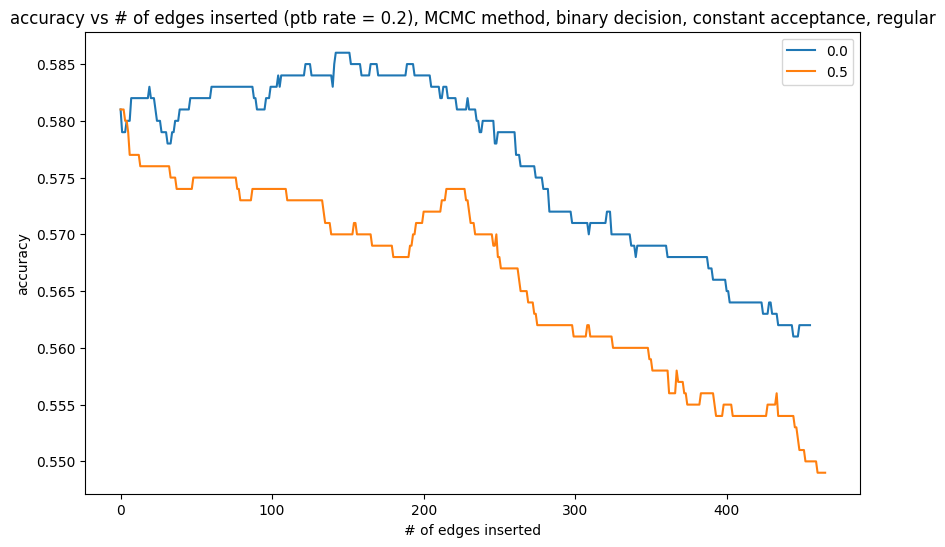

In [34]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "regular")

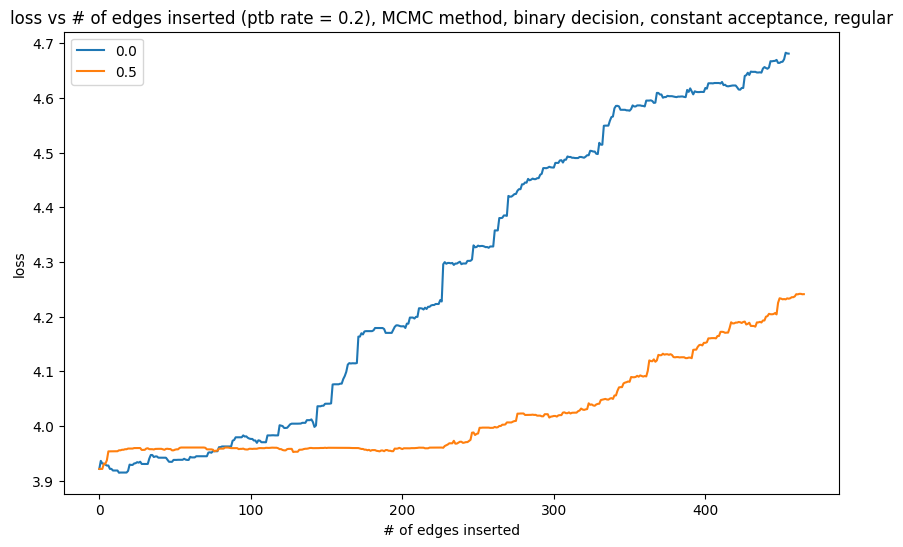

In [35]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [36]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [37]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/227 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 36, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.006900310516357422, master_dirty_delta: 0.015042781829833984
Attempt: 37, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0012443065643310547, master_dirty_delta: 0.00855255126953125
Attempt: 38, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0012443065643310547, master_dirty_delta: 0.00855255126953125
Attempt: 59, Selected: 20
max_change: 0.0392136549949646, master_clean_delta: -0.00020837783813476562, master_dirty_delta: 0.013113021850585938
Attempt: 71, Selected: 30
max_change: 0.0392136549949646, master_clean_delta: 0.00083160400390625, master_dirty_delta: 0.017671585083007812
Attempt: 72, Selected: 30
max_change: 0.0392136549949646, master_clean_delta: 0.0009970664978027344, master_dirty_delta: 0.017836570739746094
Attempt: 88, Selected: 40
max_change: 0.039213

Peturbing graph...:   0%|          | 0/238 [00:00<?, ?it/s]

In [38]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CITESEER, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"increasing"}_{"binary"}_{"attacked"}_results.pkl')

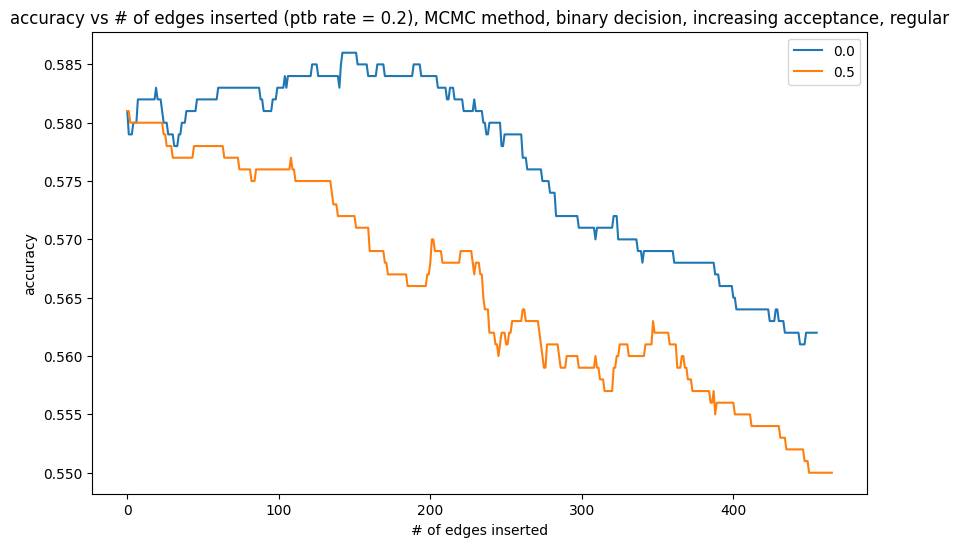

In [39]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "regular")

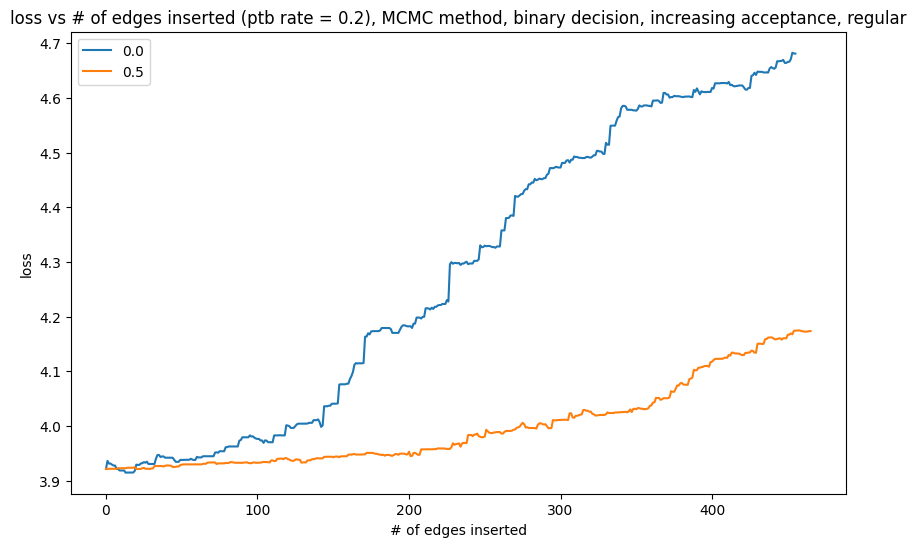

In [40]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "regular")

In [41]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [42]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/227 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 1, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0005707740783691406, master_dirty_delta: -0.0019927024841308594
Attempt: 2, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0009062290191650391, master_dirty_delta: -0.0012497901916503906
Attempt: 4, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0009374618530273438
Attempt: 5, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0013685226440429688, master_dirty_delta: -0.0014467239379882812
Attempt: 6, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.009374380111694336, master_dirty_delta: 0.009417057037353516
Attempt: 21, Selected: 10
max_change: 0.0392

Peturbing graph...:   0%|          | 0/238 [00:00<?, ?it/s]

In [43]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"constant"}_{"decaying"}_{"attacked"}_results.pkl')

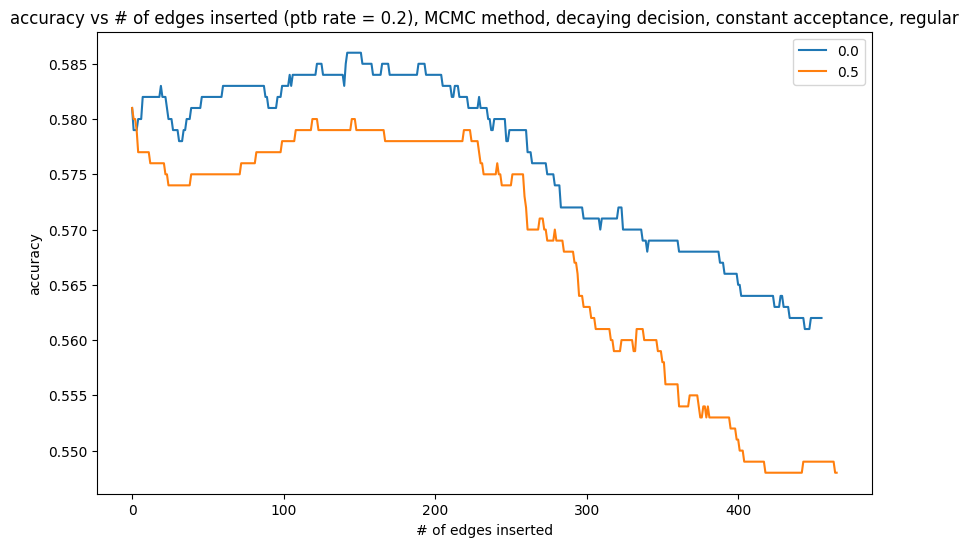

In [44]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "regular")

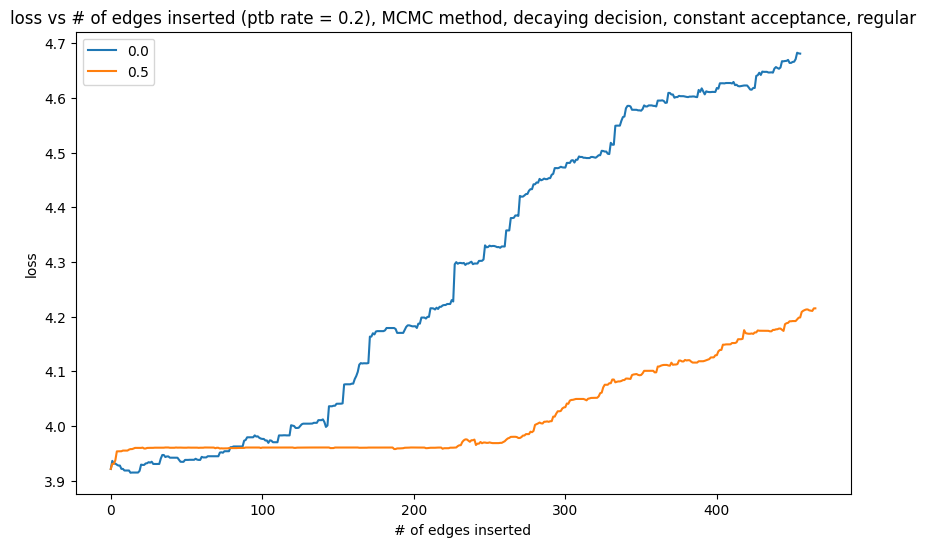

In [45]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "regular")

In [46]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [47]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/227 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 1, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0005705356597900391, master_dirty_delta: -0.0019922256469726562
Attempt: 2, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0009062290191650391, master_dirty_delta: -0.0012497901916503906
Attempt: 4, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0009374618530273438
Attempt: 5, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0013685226440429688, master_dirty_delta: -0.0014462471008300781
Attempt: 6, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.009374380111694336, master_dirty_delta: 0.009417057037353516
Attempt: 7, Selected: 0
max_change: 0.039213

Peturbing graph...:   0%|          | 0/238 [00:00<?, ?it/s]

In [48]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"increasing"}_{"decaying"}_{"attacked"}_results.pkl')

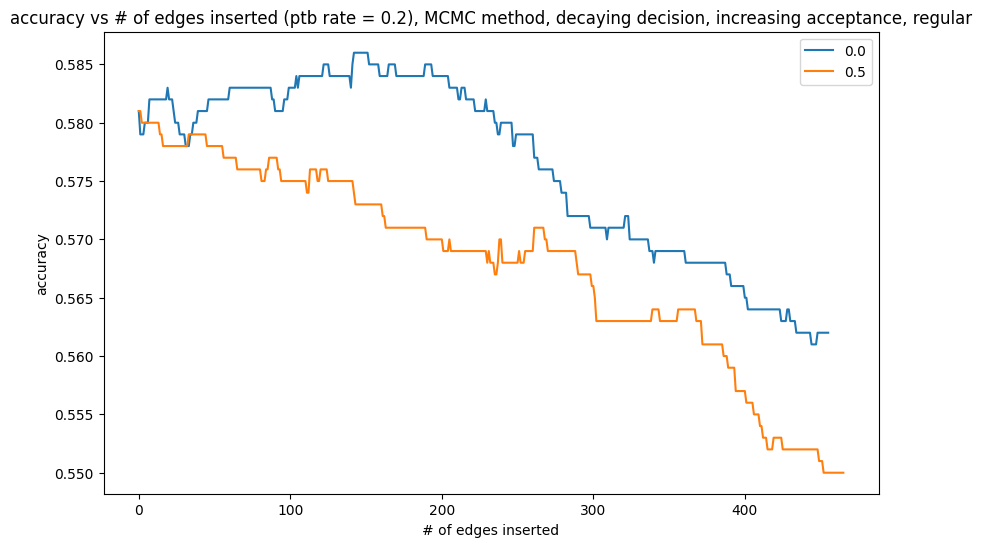

In [49]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")

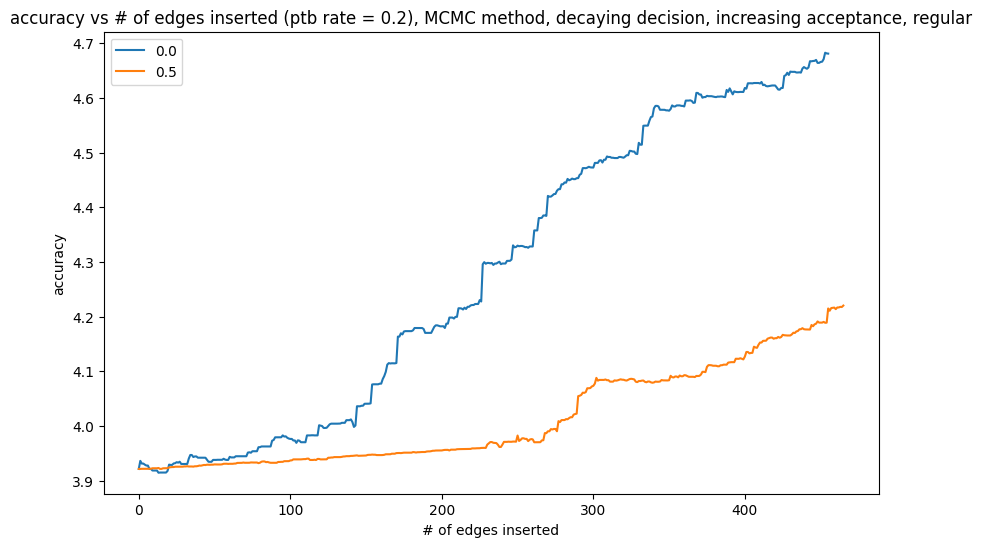

In [50]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")